In [ ]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor




#suspress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Air_Quality.csv')
df.head(10)

,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.000000
5,2024-01-01 05:00:00+00:00,Brasilia,239.0,NaN,9.4,1.9,44.0,8.7,12.4,17.600000
6,2024-01-01 06:00:00+00:00,Brasilia,215.0,NaN,6.8,1.7,47.0,7.5,10.7,18.800000
7,2024-01-01 07:00:00+00:00,Brasilia,205.0,NaN,6.0,1.8,46.0,6.1,8.7,18.400000
8,2024-01-01 08:00:00+00:00,Brasilia,201.0,NaN,6.1,2.1,45.0,5.7,8.2,18.000000
9,2024-01-01 09:00:00+00:00,Brasilia,199.0,NaN,5.9,2.2,46.0,5.7,8.2,18.400000


In [ ]:
#I want to see the number of different values of each column
df.nunique()

,0
Date,8784
City,6
CO,1094
CO2,245
NO2,1118
SO2,1164
O3,307
PM2.5,858
PM10,1751
AQI,19720


In [ ]:
#print the number of rows/columns of the dataset
df.shape

(52704, 10)

In [ ]:
#print columns name
df.columns

Index(['Date', 'City', 'CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10',
       'AQI'],
      dtype='object')

In [ ]:
#print basic info of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   CO2     9648 non-null   float64
 4   NO2     52704 non-null  float64
 5   SO2     52704 non-null  float64
 6   O3      52704 non-null  float64
 7   PM2.5   52704 non-null  float64
 8   PM10    52704 non-null  float64
 9   AQI     52704 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.0+ MB


In [ ]:
#I can see which columns have nan values
df.isna().sum()

,0
Date,0
City,0
CO,0
CO2,43056
NO2,0
SO2,0
O3,0
PM2.5,0
PM10,0
AQI,0


In [ ]:

# Impute missing CO2 values with median

df['CO2'].fillna(df['CO2'].median(), inplace=True)

#  Convert 'Date' to datetime, Extract Year, Month, Day, Hour
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour

In [ ]:
df['City'].value_counts()

,count
City,
Brasilia,8784
Cairo,8784
Dubai,8784
London,8784
New York,8784
Sydney,8784


In [ ]:

convert_city_to_int = {
    'Brasilia': 1,
    'Cairo': 2,
    'Dubai': 3,
    'London': 4,
    'New York': 5,
    'Sydney': 6
}
df['City'] = df['City'].map(convert_city_to_int)

In [ ]:
df['City'].isna().sum()

np.int64(0)

In [ ]:
df.head(10)

,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI,Year,Month,Day,Hour,City_Label
0,2024-01-01 00:00:00+00:00,1,323.0,453.0,23.8,2.8,42.0,12.0,17.1,16.800000,2024,1,1,0,Brasilia
1,2024-01-01 01:00:00+00:00,1,318.0,453.0,21.9,2.7,40.0,12.5,17.9,16.000000,2024,1,1,1,Brasilia
2,2024-01-01 02:00:00+00:00,1,309.0,453.0,19.2,2.6,39.0,12.1,17.3,15.599999,2024,1,1,2,Brasilia
3,2024-01-01 03:00:00+00:00,1,295.0,453.0,16.3,2.4,38.0,11.4,16.2,15.200000,2024,1,1,3,Brasilia
4,2024-01-01 04:00:00+00:00,1,270.0,453.0,13.0,2.1,40.0,10.2,14.6,16.000000,2024,1,1,4,Brasilia
5,2024-01-01 05:00:00+00:00,1,239.0,453.0,9.4,1.9,44.0,8.7,12.4,17.600000,2024,1,1,5,Brasilia
6,2024-01-01 06:00:00+00:00,1,215.0,453.0,6.8,1.7,47.0,7.5,10.7,18.800000,2024,1,1,6,Brasilia
7,2024-01-01 07:00:00+00:00,1,205.0,453.0,6.0,1.8,46.0,6.1,8.7,18.400000,2024,1,1,7,Brasilia
8,2024-01-01 08:00:00+00:00,1,201.0,453.0,6.1,2.1,45.0,5.7,8.2,18.000000,2024,1,1,8,Brasilia
9,2024-01-01 09:00:00+00:00,1,199.0,453.0,5.9,2.2,46.0,5.7,8.2,18.400000,2024,1,1,9,Brasilia


In [ ]:
#check for duplicated rows
df.duplicated().sum()
df.drop_duplicates(inplace=True)


<Axes: ylabel='Frequency'>

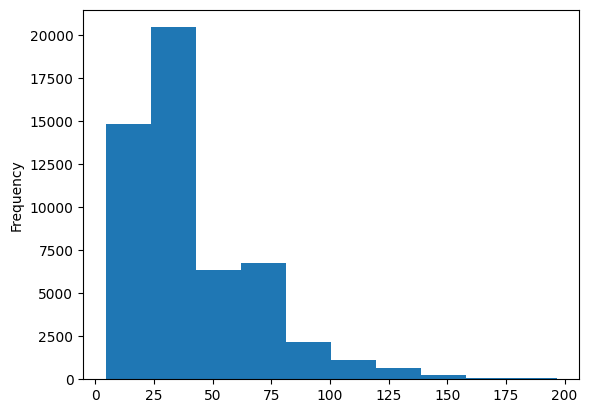

In [ ]:
#check for outliers using plots
df["AQI"].plot(kind="hist")

In [ ]:
Q1 = df['AQI'].quantile(0.25)
Q3 = df['AQI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['CO2'] < lower_bound) | (df['CO2'] > upper_bound)]


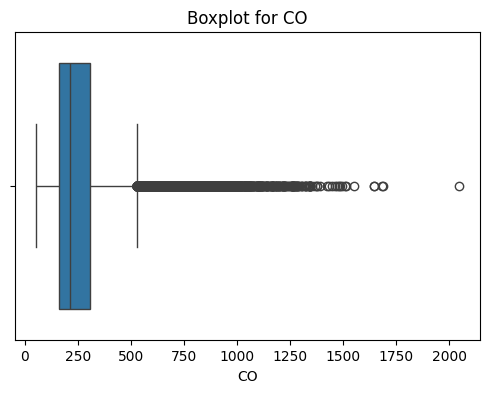

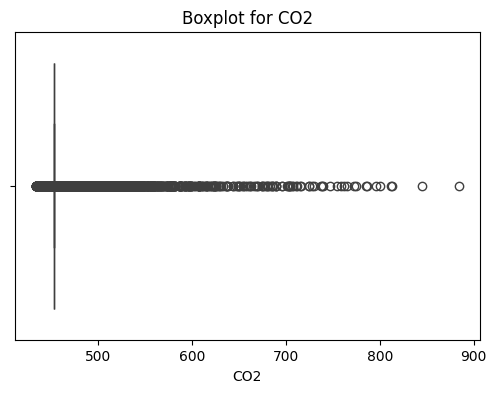

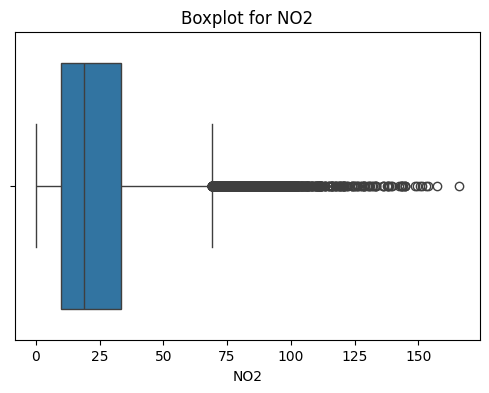

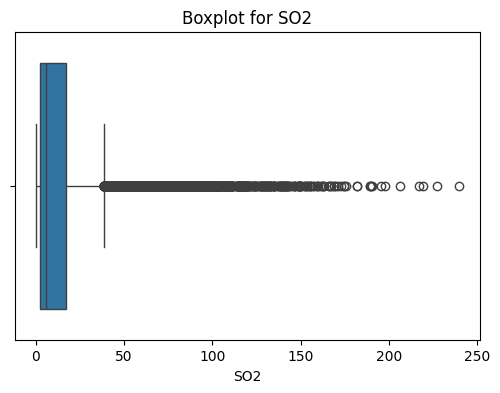

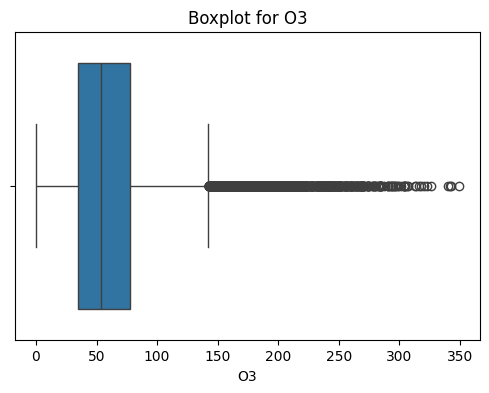

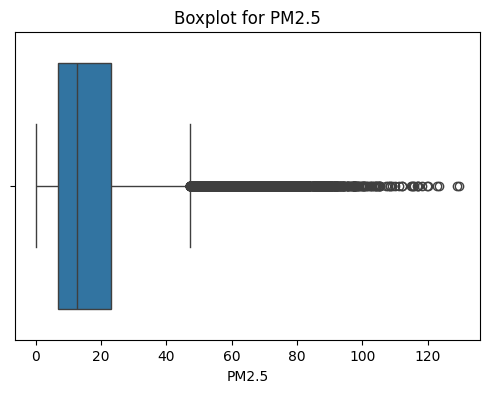

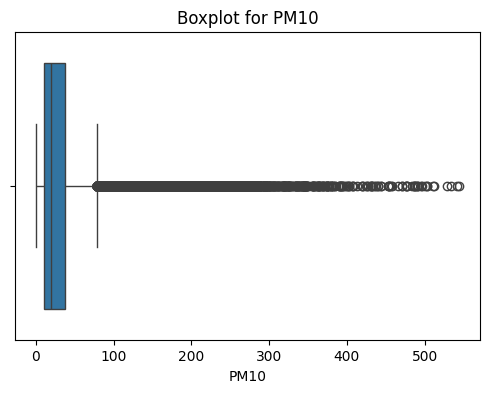

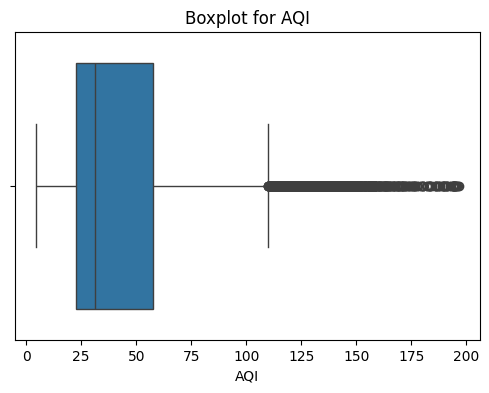

In [ ]:
numeric_cols = df.select_dtypes(include=['float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [ ]:
df.describe()

,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI,Year,Month,Day,Hour
count,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.0,52704.000000,52704.000000,52704.000000
mean,3.500000,258.258121,454.711293,24.102998,12.569869,60.025729,17.689931,35.643143,41.349339,2024.0,6.513661,15.756831,11.500000
std,1.707841,159.589953,14.893070,19.363443,17.266623,38.217348,15.670075,48.444774,26.626149,0.0,3.451267,8.811613,6.922252
min,1.000000,52.000000,434.000000,0.000000,0.000000,0.000000,0.100000,0.100000,4.450000,2024.0,1.000000,1.000000,0.000000
25%,2.000000,159.000000,453.000000,9.700000,2.300000,35.000000,6.900000,10.200000,22.800000,2024.0,4.000000,8.000000,5.750000
50%,3.500000,213.000000,453.000000,18.900000,5.700000,54.000000,12.500000,18.900000,31.270835,2024.0,7.000000,16.000000,11.500000
75%,5.000000,306.000000,453.000000,33.400000,16.800000,78.000000,23.000000,37.500000,57.702089,2024.0,10.000000,23.000000,17.250000
max,6.000000,2045.000000,884.000000,165.900000,239.700000,349.000000,129.500000,543.900000,196.633330,2024.0,12.000000,31.000000,23.000000


In [ ]:
df.corr()

,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI,Year,Month,Day,Hour
Date,1.000000e+00,-3.007947e-13,0.027984,0.164715,0.013051,0.028324,0.042310,-0.014272,-0.030308,0.003656,NaN,9.965127e-01,8.970922e-02,2.729868e-03
City,-3.007947e-13,1.000000e+00,-0.237986,0.053964,-0.012438,-0.263158,-0.165665,-0.127012,-0.128559,-0.204811,NaN,-1.571121e-15,-3.365443e-15,-1.705639e-15
CO,2.798417e-02,-2.379864e-01,1.000000,0.233907,0.749779,0.534678,0.039805,0.714858,0.514528,0.537100,NaN,2.712095e-02,8.800146e-03,-2.934836e-02
CO2,1.647154e-01,5.396416e-02,0.233907,1.000000,0.275589,0.079554,-0.185498,0.103976,0.012411,0.038314,NaN,1.631561e-01,2.470143e-02,-2.379935e-03
NO2,1.305100e-02,-1.243849e-02,0.749779,0.275589,1.000000,0.557087,-0.291854,0.655540,0.414105,0.403690,NaN,1.272709e-02,3.060214e-03,-1.636730e-02
SO2,2.832425e-02,-2.631579e-01,0.534678,0.079554,0.557087,1.000000,0.014256,0.541177,0.363159,0.451506,NaN,2.943551e-02,-1.304942e-02,-3.221956e-02
O3,4.230970e-02,-1.656647e-01,0.039805,-0.185498,-0.291854,0.014256,1.000000,0.194954,0.294076,0.452599,NaN,4.106095e-02,1.959732e-02,1.279000e-01
PM2.5,-1.427243e-02,-1.270122e-01,0.714858,0.103976,0.655540,0.541177,0.194954,1.000000,0.867965,0.822101,NaN,-1.437253e-02,3.510374e-03,-4.242305e-02
PM10,-3.030775e-02,-1.285593e-01,0.514528,0.012411,0.414105,0.363159,0.294076,0.867965,1.000000,0.845944,NaN,-3.004691e-02,-1.056957e-03,-1.945238e-02
AQI,3.656232e-03,-2.048113e-01,0.537100,0.038314,0.403690,0.451506,0.452599,0.822101,0.845944,1.000000,NaN,3.979706e-03,-2.867093e-03,3.649949e-02


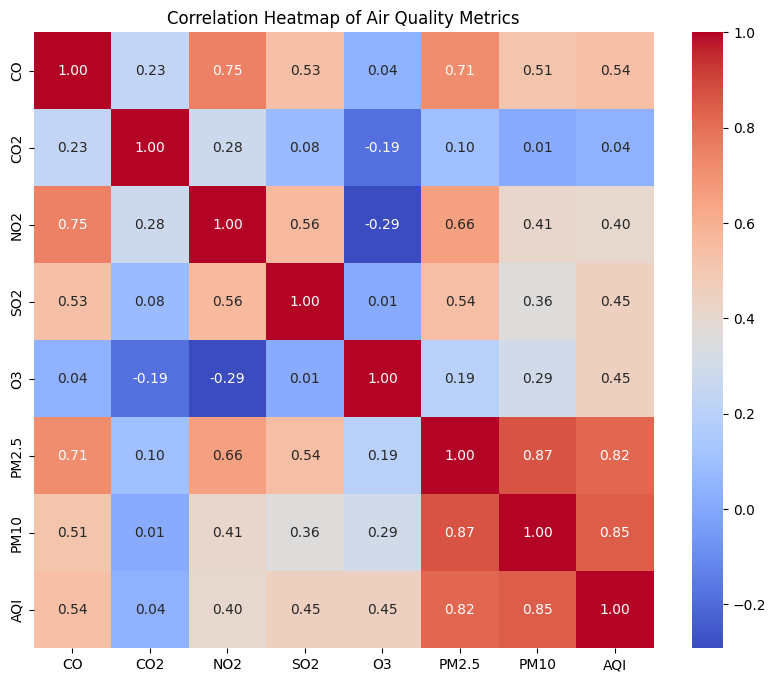

In [ ]:
# Plot: Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df[['CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Air Quality Metrics")
plt.show()

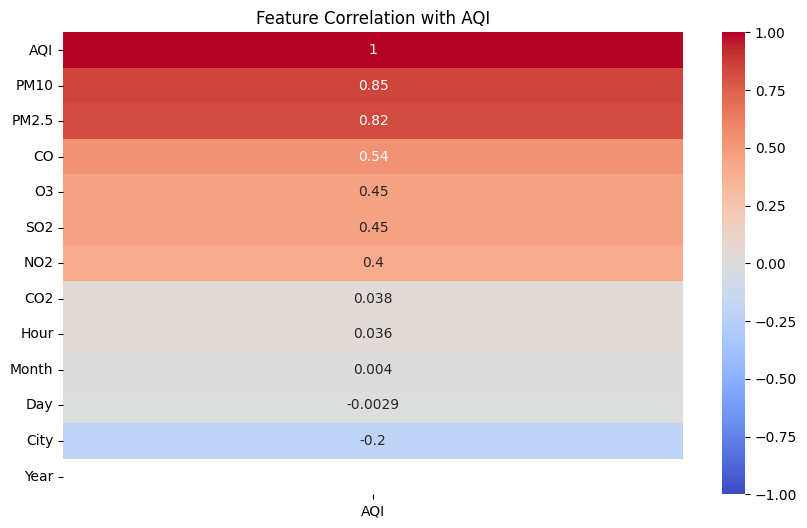

,AQI
AQI,1.000000
PM10,0.845944
PM2.5,0.822101
CO,0.537100
O3,0.452599
SO2,0.451506
NO2,0.403690
CO2,0.038314
Hour,0.036499
Month,0.003980


In [ ]:
# Compute correlation matrix
cor = df.corr(numeric_only=True)

# Plot the heatmap of correlation with respect to Price
plt.figure(figsize=(10, 6))
sns.heatmap(cor[["AQI"]].sort_values(by="AQI", ascending=False), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation with AQI")
plt.show()

# Show sorted correlations as a reference
cor["AQI"].sort_values(ascending=False)

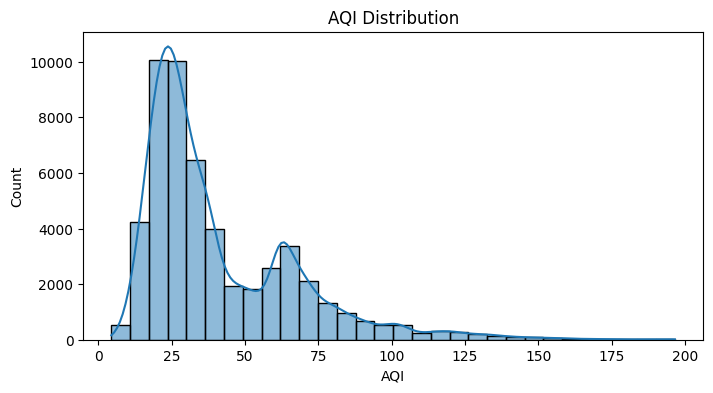

In [ ]:
# Plot: Distribution of AQI
plt.figure(figsize=(8, 4))
sns.histplot(df['AQI'], kde=True, bins=30)
plt.title("AQI Distribution")
plt.show()

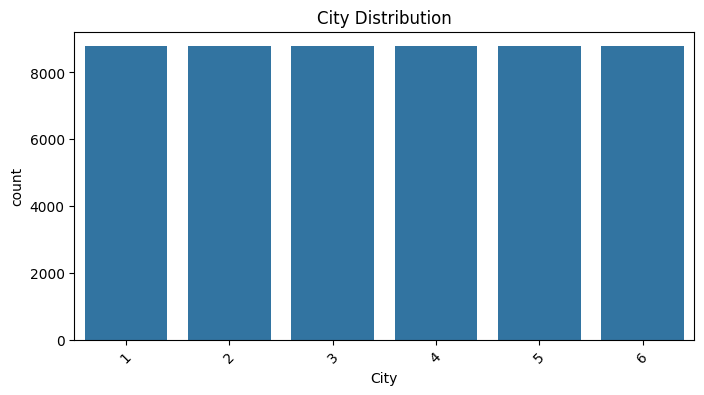

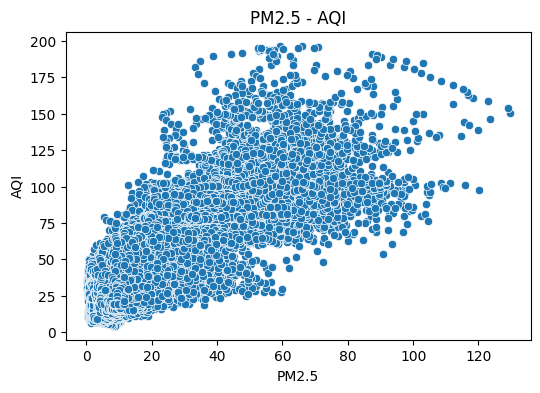

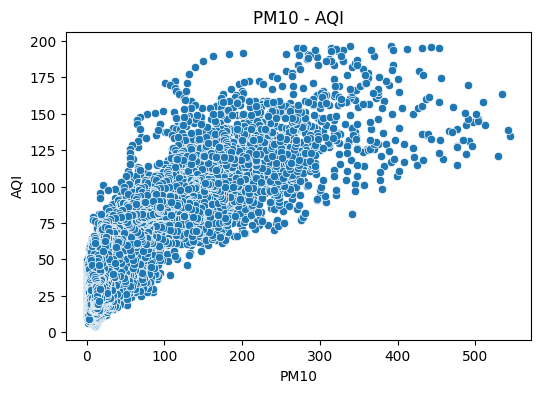

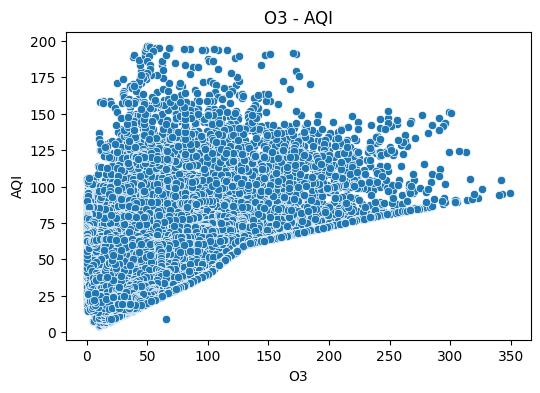

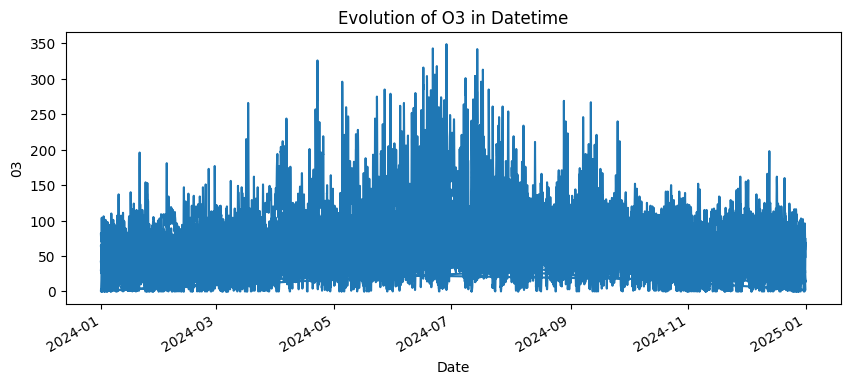

In [ ]:
# Plot : City Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='City')
plt.title("City Distribution")
plt.xticks(rotation=45)
plt.show()



# Scatter plot

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='PM2.5', y='AQI')
plt.title('PM2.5 - AQI')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='PM10', y='AQI')
plt.title('PM10 - AQI')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='O3', y='AQI')
plt.title('O3 - AQI')
plt.show()

# Line plot
plt.figure(figsize=(10,4))
df.set_index('Date')['O3'].plot()
plt.title('Evolution of O3 in Datetime')
plt.ylabel('03')
plt.show()



In [ ]:
# Train a linear regression model


  RMSE: 11.35
  R²: 0.8201


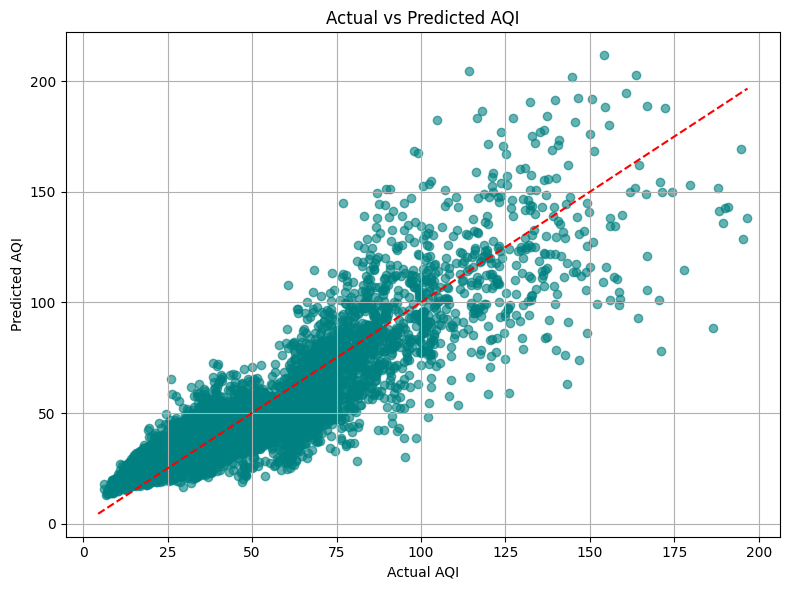

In [ ]:

features = ['CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', ]
target = 'AQI'
X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse =np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

print(f"\n  RMSE: {rmse:,.2f}")
print(f"  R²: {r2:.4f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Predict using the trained model
y_pred = model.predict(X_test)

# Compare predicted vs actual
comparison_df = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})
print(comparison_df.head(10))

   Actual Price  Predicted Price
0     30.400000        30.120869
1     60.453335        38.576893
2     38.899998        41.592028
3     22.925000        21.542981
4     47.333336        43.124591
5     18.800000        20.325058
6     26.800001        24.906501
7     39.600000        29.503932
8     25.958332        28.210245
9     40.666664        51.273989


In [ ]:
#Train a DecisionTree regression model and RandomForest regression model

In [ ]:
# Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=12)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=12)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)



In [ ]:
# Evaluation for Decision Tree
tree_mae = mean_absolute_error(y_test, tree_pred)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_pred))
tree_r2 = r2_score(y_test, tree_pred)

# Evaluation for Random Forest
forest_mae = mean_absolute_error(y_test, forest_pred)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
forest_r2 = r2_score(y_test, forest_pred)

print(f"\n Decision Tree RMSE: {tree_rmse:,.2f}")
print(f" Decision Tree R²: {tree_r2:.4f}")
print(f"\n Random Forest RMSE: {forest_rmse:,.2f}")
print(f" Random Forest R²: {forest_r2:.4f}\n")




 Decision Tree RMSE: 10.86
 Decision Tree R²: 0.8258

 Random Forest RMSE: 7.65
 Random Forest R²: 0.9137



In [ ]:
#Train a XGBoost regression model and RandomForest regression model

In [ ]:
features = ['CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10' ]
target = 'AQI'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=12)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("XGBoost Results:")

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


XGBoost Results:
RMSE: 8.43
R²: 0.90


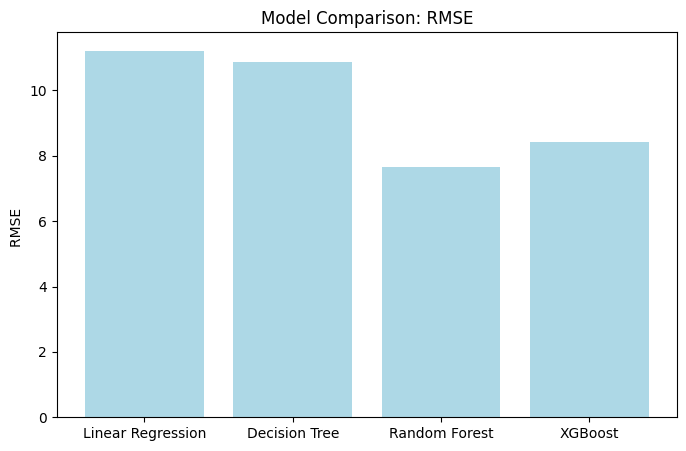

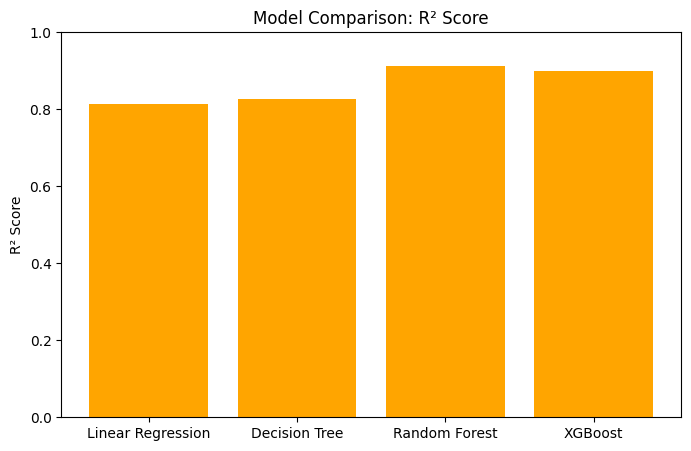

In [ ]:
# Data
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
rmse = [11.35, 10.86, 7.65, 8.43 ]
r2 = [0.8201, 0.8258, 0.9137 , 0.90]

# Plot
plt.figure(figsize=(8, 5))

# RMSE
plt.bar(models, rmse, color='lightblue', label='RMSE ')


plt.ylabel("RMSE ")
plt.title("Model Comparison: RMSE")
plt.show()

# R²
plt.figure(figsize=(8, 5))
plt.bar(models, r2, color='orange', label='R² Score')


plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.title("Model Comparison: R² Score")
plt.show()

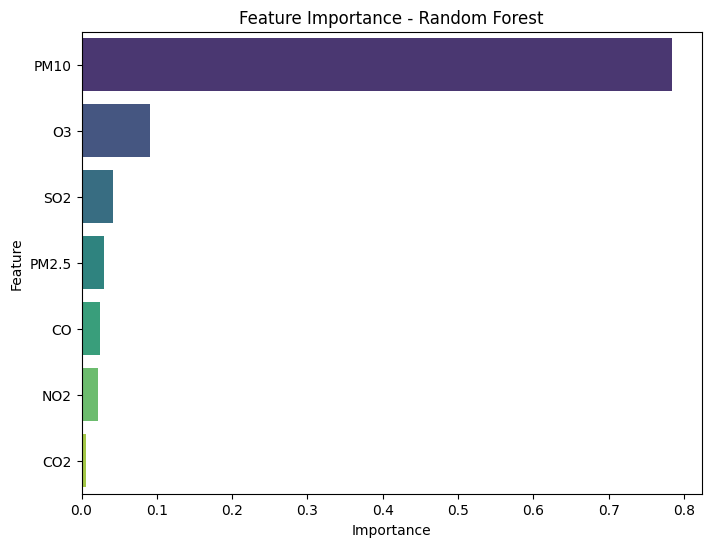

In [ ]:
importances = forest_model.feature_importances_
features = ['CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10']

# Ταξινόμηση για καλύτερη απεικόνιση
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices], y=np.array(features)[indices], palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


